# 1.3) Supervised Localization

An EfficientNet is trained here to perform a regression task which assigns a location, that is the x and y position, to each laser point in an image.

# Import statements
Following packages are necessary:

In [1]:
import random
import utils

import tensorflow as tf
import numpy as np

from efficientnet.tfkeras import EfficientNetB0

#import efficientnet
#from efficientnet.tfkeras import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from lastengen import LASTENSequence
from matplotlib import pyplot as plt

# Checks

The version of tensorflow as well as the GPU support are checked.

In [2]:
print(tf.__version__)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

2.0.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Data

Import training images

In [3]:
path_train = r'D:\LASTEN\train'
path_validation = r'D:\LASTEN\validation'
path_test = r'D:\LASTEN\test'

#path_train = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/train'
#path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/validation'
#path_test = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/test'

width = 384
height = 384

grid_width = 18
grid_height = 18

# Seeding

Seeds are set to ensure reproducible training.

In [4]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network

An EfficientNet network is instantiated with keras to run a regression task.

In [5]:
base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(height, width, 1))

x = base_model.output
x = GlobalAveragePooling2D()(x)

predictions = Dense(2 * grid_width * grid_height, activation='linear',)(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 384, 384, 1) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 192, 192, 32) 288         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 192, 192, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 192, 192, 32) 0           stem_bn[0][0]                    
______________________________________________________________________________________________

# Data Preparation

The generator sequence for training is built.

In [6]:
image_ids = None

train_gen = LASTENSequence(path_train,
                           batch_size=16,
                           image_ids=image_ids,
                           #preprocess_input=preprocess_input,
                           shuffle=True,
                           augment=True,
                           width=width,
                           height=height,
                           label="keypoints")

validation_gen = LASTENSequence(path_validation,
                                batch_size=16,
                                #preprocess_input=preprocess_input,
                                width=width,
                                height=height,
                                label="keypoints")

#test_gen = LASTENSequence(path_train,
#                          batch_size=8,
#                          preprocess_input=pre_une,
#                          width=width,
#                          height=height)

# Training Preparation

Prepare the settings for training the model.

In [7]:
save_path = "experiments/1_3_localization"

logger = CSVLogger(save_path + "/result.log")
checker = ModelCheckpoint(save_path + "/weights.{epoch:02d}.hdf5",
                          period=10)

callbacks = [logger, checker]

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training

The model is fitted with a generator.

In [8]:
model.fit_generator(train_gen,
                    epochs=300,
                    callbacks=callbacks,
                    validation_data=validation_gen,
                    validation_freq=1,
                    use_multiprocessing=True,
                    workers=10,
                    max_queue_size=32)

Epoch 1/300
11/11 [==============================] - 36s 3s/step - loss: 36804.7212 - mae: 177.4322 - val_loss: 38321.6667 - val_mae: 182.6386
Epoch 2/300
11/11 [==============================] - 23s 2s/step - loss: 35296.7931 - mae: 173.8348 - val_loss: 26667.0267 - val_mae: 150.8605
Epoch 3/300
11/11 [==============================] - 23s 2s/step - loss: 33925.3349 - mae: 170.2818 - val_loss: 23004.7897 - val_mae: 139.2756
Epoch 4/300
11/11 [==============================] - 23s 2s/step - loss: 32659.9348 - mae: 166.9210 - val_loss: 30704.7539 - val_mae: 162.6220
Epoch 5/300
11/11 [==============================] - 23s 2s/step - loss: 30992.4379 - mae: 162.0736 - val_loss: 19945.6354 - val_mae: 128.7435
Epoch 6/300
11/11 [==============================] - 22s 2s/step - loss: 29146.5142 - mae: 157.2139 - val_loss: 19636.6771 - val_mae: 127.5480
Epoch 7/300
11/11 [==============================] - 23s 2s/step - loss: 27694.0587 - mae: 152.8833 - val_loss: 16596.3402 - val_mae: 115.9203

11/11 [==============================] - 22s 2s/step - loss: 2649.5909 - mae: 38.1894 - val_loss: 2180.4240 - val_mae: 34.4490
Epoch 60/300
11/11 [==============================] - 23s 2s/step - loss: 2593.3591 - mae: 37.7513 - val_loss: 2118.9284 - val_mae: 33.7081
Epoch 61/300
11/11 [==============================] - 22s 2s/step - loss: 2619.1512 - mae: 37.4351 - val_loss: 2114.8228 - val_mae: 33.5452
Epoch 62/300
11/11 [==============================] - 22s 2s/step - loss: 2640.9828 - mae: 38.0186 - val_loss: 2237.1096 - val_mae: 34.3886
Epoch 63/300
11/11 [==============================] - 22s 2s/step - loss: 2554.3599 - mae: 37.3604 - val_loss: 2156.7720 - val_mae: 33.8579
Epoch 64/300
11/11 [==============================] - 22s 2s/step - loss: 2576.3227 - mae: 37.4875 - val_loss: 2132.0392 - val_mae: 33.7309
Epoch 65/300
11/11 [==============================] - 22s 2s/step - loss: 2582.8571 - mae: 37.5210 - val_loss: 2197.9649 - val_mae: 33.8339
Epoch 66/300
11/11 [=============

11/11 [==============================] - 22s 2s/step - loss: 1651.4741 - mae: 26.0204 - val_loss: 862.0757 - val_mae: 17.7527
Epoch 118/300
11/11 [==============================] - 22s 2s/step - loss: 1753.3701 - mae: 27.4447 - val_loss: 1010.7014 - val_mae: 22.5530
Epoch 119/300
11/11 [==============================] - 22s 2s/step - loss: 1739.5871 - mae: 27.4949 - val_loss: 948.6007 - val_mae: 20.5277
Epoch 120/300
11/11 [==============================] - 22s 2s/step - loss: 1580.3932 - mae: 24.8358 - val_loss: 883.5152 - val_mae: 18.4652
Epoch 121/300
11/11 [==============================] - 22s 2s/step - loss: 1654.8358 - mae: 26.1146 - val_loss: 884.7176 - val_mae: 18.4464
Epoch 122/300
11/11 [==============================] - 21s 2s/step - loss: 1559.7395 - mae: 25.3780 - val_loss: 863.5392 - val_mae: 18.2997
Epoch 123/300
11/11 [==============================] - 21s 2s/step - loss: 1677.8048 - mae: 26.1110 - val_loss: 809.0847 - val_mae: 16.2065
Epoch 124/300
11/11 [============

11/11 [==============================] - 22s 2s/step - loss: 1339.4878 - mae: 22.6029 - val_loss: 756.8856 - val_mae: 14.5051
Epoch 176/300
11/11 [==============================] - 22s 2s/step - loss: 1316.3107 - mae: 22.5983 - val_loss: 770.5251 - val_mae: 14.9999
Epoch 177/300
11/11 [==============================] - 21s 2s/step - loss: 1400.3815 - mae: 23.5532 - val_loss: 752.1377 - val_mae: 14.6103
Epoch 178/300
11/11 [==============================] - 21s 2s/step - loss: 1360.0271 - mae: 22.9043 - val_loss: 863.7085 - val_mae: 18.9021
Epoch 179/300
11/11 [==============================] - 21s 2s/step - loss: 1282.5180 - mae: 21.9555 - val_loss: 850.0809 - val_mae: 18.9689
Epoch 180/300
11/11 [==============================] - 22s 2s/step - loss: 1310.0887 - mae: 22.7213 - val_loss: 800.9053 - val_mae: 16.9887
Epoch 181/300
11/11 [==============================] - 21s 2s/step - loss: 1272.8793 - mae: 21.9891 - val_loss: 824.7559 - val_mae: 17.7628
Epoch 182/300
11/11 [=============

11/11 [==============================] - 22s 2s/step - loss: 1238.0806 - mae: 21.6077 - val_loss: 705.2676 - val_mae: 13.8244
Epoch 234/300
11/11 [==============================] - 21s 2s/step - loss: 1272.0629 - mae: 22.3569 - val_loss: 700.7900 - val_mae: 13.0886
Epoch 235/300
11/11 [==============================] - 21s 2s/step - loss: 1256.8937 - mae: 21.0105 - val_loss: 744.7531 - val_mae: 15.2516
Epoch 236/300
11/11 [==============================] - 22s 2s/step - loss: 1207.9761 - mae: 20.8715 - val_loss: 713.3084 - val_mae: 13.9006
Epoch 237/300
11/11 [==============================] - 21s 2s/step - loss: 1231.4844 - mae: 21.4409 - val_loss: 733.5519 - val_mae: 14.9430
Epoch 238/300
11/11 [==============================] - 21s 2s/step - loss: 1271.0515 - mae: 21.3015 - val_loss: 708.9323 - val_mae: 13.5385
Epoch 239/300
11/11 [==============================] - 22s 2s/step - loss: 1196.6860 - mae: 20.9423 - val_loss: 779.7802 - val_mae: 17.5066
Epoch 240/300
11/11 [=============

11/11 [==============================] - 22s 2s/step - loss: 972.8197 - mae: 19.9695 - val_loss: 516.3145 - val_mae: 12.3957
Epoch 292/300
11/11 [==============================] - 22s 2s/step - loss: 933.5399 - mae: 19.0922 - val_loss: 514.6650 - val_mae: 12.7220
Epoch 293/300
11/11 [==============================] - 22s 2s/step - loss: 985.8069 - mae: 19.6634 - val_loss: 613.2604 - val_mae: 16.5671
Epoch 294/300
11/11 [==============================] - 22s 2s/step - loss: 898.2818 - mae: 18.5630 - val_loss: 529.7960 - val_mae: 13.0730
Epoch 295/300
11/11 [==============================] - 22s 2s/step - loss: 966.7199 - mae: 19.4057 - val_loss: 524.6413 - val_mae: 13.3074
Epoch 296/300
11/11 [==============================] - 22s 2s/step - loss: 1056.1160 - mae: 20.6128 - val_loss: 515.6595 - val_mae: 13.0613
Epoch 297/300
11/11 [==============================] - 21s 2s/step - loss: 958.3344 - mae: 19.4495 - val_loss: 587.9694 - val_mae: 15.7599
Epoch 298/300
11/11 [===================

In [9]:
X, y = train_gen[0]
y_pred = model.predict(X)

In [10]:
plt.rcParams['figure.figsize'] = (15, 15)

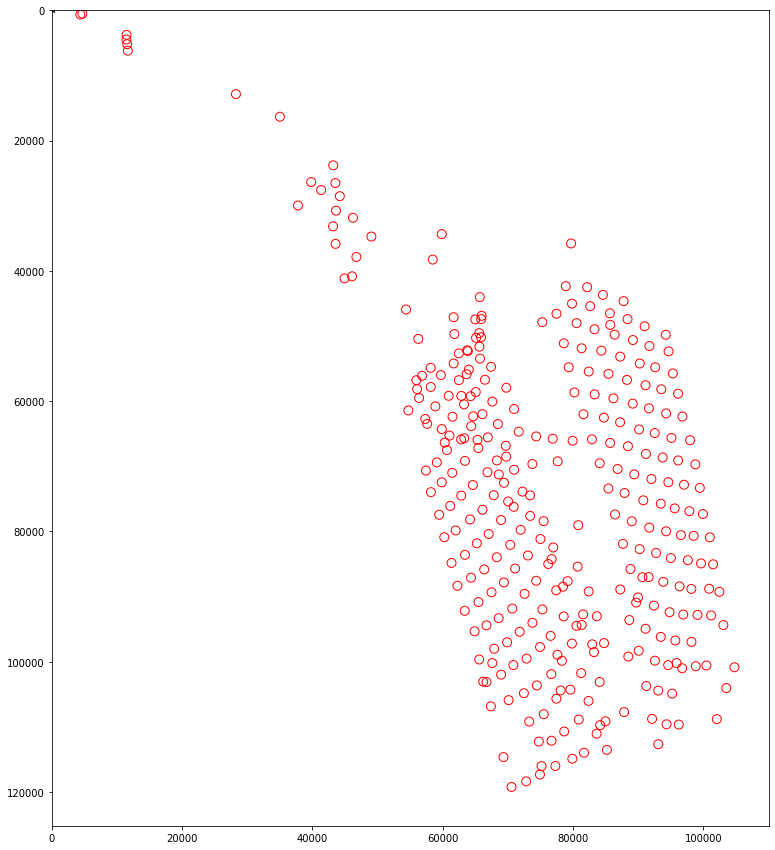

In [11]:
image = X[0]
keypoints = y_pred[0]

plt.clf()
plt.imshow(image[:,:,0], cmap="gray")

x_list = []
y_list = []

for index in range(0, 18*18):
    x_index = index * 2 
    
    x = (keypoints[x_index] - 1) * width
    y = (keypoints[x_index + 1] - 1) * height
    
    x_list.append(x)
    y_list.append(y)
    
    
plt.scatter(x_list, y_list,s=80,facecolors='none', edgecolors='r')